In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import tifffile as tf

import sys
sys.path.append( "AnalysisUtils" )
import plotconfig as pconf
import matread as mread
import funx_mk as mk
import pandas as pd
import seaborn as sns
import math
from AnalysisUtils.colorprint import cprint

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import matplotlib.colors as mlcolors
import matplotlib.cbook as cbook
from matplotlib import cm
%config InlineBackend.figure_format = 'svg'

IMAGES_PATH = Path() / "ResultImgs"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.ndimage.filters import gaussian_filter1d
def z_score(X):
    # X: ndarray, shape (n_features, n_samples)
    ss = StandardScaler(with_mean=True, with_std=True)
    Xz = ss.fit_transform(X.T).T
    return Xz

/var/folders/s4/2zbghmz93tgc1p92fqgjtwm54hbxdy/T/ipykernel_83726/429328024.py:4: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


In [33]:
fieldname = 'DATA/SC18_220908_12odorsglom'
glom_session1 = mk.read_session(fieldname)

fieldname = 'DATA/SC52_220830_12odorsglom'
glom_session2 = mk.read_session(fieldname)

fieldname = 'DATA/SC50W_220831_12odorsglom'
glom_session3 = mk.read_session(fieldname)

fieldname = 'DATA/SC1947_220905_12odorsglom'
glom_session4 = mk.read_session(fieldname)

fieldname = 'DATA/SC18_220628_13odorsglom'
glom_session5 = mk.read_session(fieldname)

fieldname = 'DATA/SC49W_220523_8odorsglom'
glom_session6 = mk.read_session(fieldname)

fieldname = 'DATA/SC49R_220523_8odorsglom'
glom_session7 = mk.read_session(fieldname)

fieldname = 'DATA/SC48_220522_8odorsglom1'
glom_session8 = mk.read_session(fieldname)
fieldname = 'DATA/SC48_220522_8odorsglom2'
glom_session9 = mk.read_session(fieldname)

Number of Stimulus Types: 25
Number of Trial per Stimulus: 3
Dimensions of single trial array (# time points by # neuron # Trial): (348, 74, 3)
Number of Stimulus Types: 25
Number of Trial per Stimulus: 3
Dimensions of single trial array (# time points by # neuron # Trial): (348, 63, 3)
Number of Stimulus Types: 25
Number of Trial per Stimulus: 3
Dimensions of single trial array (# time points by # neuron # Trial): (348, 34, 3)
Number of Stimulus Types: 25
Number of Trial per Stimulus: 3
Dimensions of single trial array (# time points by # neuron # Trial): (348, 59, 3)
Number of Stimulus Types: 27
Number of Trial per Stimulus: 4
Dimensions of single trial array (# time points by # neuron # Trial): (348, 58, 4)
Number of Stimulus Types: 25
Number of Trial per Stimulus: 4
Dimensions of single trial array (# time points by # neuron # Trial): (348, 95, 4)
Number of Stimulus Types: 25
Number of Trial per Stimulus: 5
Dimensions of single trial array (# time points by # neuron # Trial): (348,

In [ ]:
df_stat2 = mk.calc_onset_time(glom_session2['odor_responses'], glom_session2['odor_list'], threshold1=6.0, threshold2=4.0)
df_stat1 = mk.calc_onset_time(glom_session1['odor_responses'], glom_session1['odor_list'], threshold1=6.0, threshold2=4.0)
df_stat3 = mk.calc_onset_time(glom_session3['odor_responses'], glom_session3['odor_list'], threshold1=6.0, threshold2=4.0)
df_stat4 = mk.calc_onset_time(glom_session4['odor_responses'], glom_session4['odor_list'], threshold1=6.0, threshold2=4.0)
df_stat5 = mk.calc_onset_time(glom_session5['odor_responses'], glom_session5['odor_list'], threshold1=6.0, threshold2=4.0)
df_stat6 = mk.calc_onset_time(glom_session6['odor_responses'], glom_session6['odor_list'], threshold1=6.0, threshold2=4.0)
df_stat7 = mk.calc_onset_time(glom_session7['odor_responses'], glom_session7['odor_list'], threshold1=6.0, threshold2=4.0)
df_stat8 = mk.calc_onset_time(glom_session8['odor_responses'], glom_session8['odor_list'], threshold1=6.0, threshold2=4.0)
df_stat9 = mk.calc_onset_time(glom_session9['odor_responses'], glom_session9['odor_list'], threshold1=6.0, threshold2=4.0)

/Users/karadm01/Library/CloudStorage/OneDrive-Personal/TemporalWindow/AnalysisUtils/funx_mk.py:238: RuntimeWarning: All-NaN slice encountered
  max_normalized = ((max_val_temp.T/np.nanmax(max_val_temp,axis=1)).T) + 0.01*max_val_temp # to make odor cases unique by giving bias to high responses
/Users/karadm01/Library/CloudStorage/OneDrive-Personal/TemporalWindow/AnalysisUtils/funx_mk.py:239: RuntimeWarning: All-NaN slice encountered
  mean_normalized = ((mean_val_temp.T/np.nanmax(mean_val_temp,axis=1)).T) + 0.01*mean_val_temp
/Users/karadm01/Library/CloudStorage/OneDrive-Personal/TemporalWindow/AnalysisUtils/funx_mk.py:246: RuntimeWarning: All-NaN slice encountered
  cell_latencies_tofirst[:,jj] = cell_latencies[:,jj] - np.nanmin(cell_latencies[:,jj])


In [ ]:
df_stat_resp = df_stat[df_stat['response_sign'] == 1]
ratio = (df_stat_resp['mean_odor_resp'] / df_stat_resp['std_baseline']).mean()
# Distribution for response_sign == 1
dist_pos = df_stat_resp['mean_odor_resp'] / df_stat_resp['std_baseline']

# Distribution for response_sign == 0
dist_neg = df_stat[df_stat['response_sign'] == 0]['mean_odor_resp'] / df_stat[df_stat['response_sign'] == 0]['std_baseline']


/Users/karadm01/Library/CloudStorage/OneDrive-Personal/TemporalWindow/AnalysisUtils/funx_mk.py:238: RuntimeWarning: All-NaN slice encountered
  max_normalized = ((max_val_temp.T/np.nanmax(max_val_temp,axis=1)).T) + 0.01*max_val_temp # to make odor cases unique by giving bias to high responses
/Users/karadm01/Library/CloudStorage/OneDrive-Personal/TemporalWindow/AnalysisUtils/funx_mk.py:239: RuntimeWarning: All-NaN slice encountered
  mean_normalized = ((mean_val_temp.T/np.nanmax(mean_val_temp,axis=1)).T) + 0.01*mean_val_temp


,roi_id,odor_val,response_sign,std_baseline,mean_baseline,max_val,mean_odor_resp,mean_resp,max_resp,std_odor_resp,latencies,latency_rank,max_normalized,mean_normalized,max_amp_rank,mean_amp_rank,latencies_tofirst
0,1,Cin 1.0,0,0.019142,-0.005070,0.139629,0.049169,NaN,NaN,0.070455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Cin 5.0,0,0.044531,0.022829,0.193785,0.064152,NaN,NaN,0.096560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Cin50.0,0,0.025376,-0.009191,0.171433,0.082344,NaN,NaN,0.049403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Etg 1.0,1,0.039529,-0.009018,0.492651,0.331946,0.331946,0.492651,0.092326,140.007223,13.0,0.203942,0.451831,16.0,11.0,92.984366
4,1,Etg 5.0,0,0.049691,-0.002789,0.112239,0.008700,NaN,NaN,0.059466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,95,Benz50.0,1,0.016214,-0.001486,0.279734,0.163628,0.163628,0.279734,0.106001,137.989558,20.0,0.586804,0.683288,22.0,19.0,87.004622
2371,95,Mvt 1.0,0,0.010559,-0.002451,0.073922,0.030049,NaN,NaN,0.030338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2372,95,Mvt 5.0,0,0.015753,-0.002030,0.079831,0.024813,NaN,NaN,0.042140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2373,95,Mvt50.0,1,0.019938,0.003675,0.478991,0.240046,0.240046,0.478991,0.156955,159.987105,41.0,1.004790,1.002400,21.0,21.0,133.999128


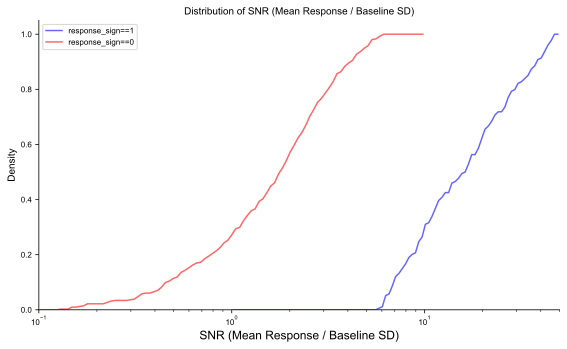

In [66]:
df_stat_resp = df_stat[df_stat['response_sign'] == 1]
ratio = (df_stat_resp['mean_odor_resp'] / df_stat_resp['std_baseline']).mean()
# Distribution for response_sign == 1
dist_pos = df_stat_resp['mean_odor_resp'] / df_stat_resp['std_baseline']

# Distribution for response_sign == 0
dist_neg = df_stat[df_stat['response_sign'] == 0]['mean_odor_resp'] / df_stat[df_stat['response_sign'] == 0]['std_baseline']

# Use logarithmic bins
bins1 = np.logspace(np.log10(0.1), np.log10(10), 100)
bins2 = np.logspace(np.log10(1), np.log10(50), 100)
plt.figure(figsize=(8, 5))
sns.histplot(np.abs(dist_pos), color='blue', label='response_sign==1', stat='density', bins=bins2, alpha=0.6,cumulative=True,element='poly',fill=False)
sns.histplot(np.abs(dist_neg), color='red', label='response_sign==0', stat='density', bins=bins1, alpha=0.6,cumulative=True, element='poly',fill=False)
plt.xscale('log')
plt.xlim(0.1, 50)
plt.xlabel('SNR (Mean Response / Baseline SD)', fontsize=12)
plt.ylabel('Density')
plt.title('Distribution of SNR (Mean Response / Baseline SD)')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

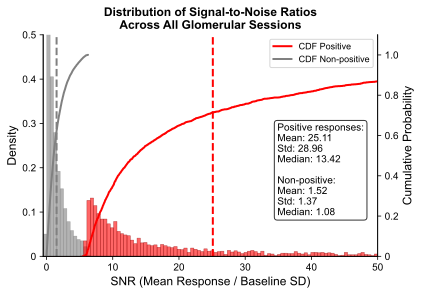

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate onset statistics for all sessions
df_stat1 = mk.calc_onset_time(glom_session1['odor_responses'], glom_session1['odor_list'], threshold1=6.0, threshold2=4.0)
df_stat2 = mk.calc_onset_time(glom_session2['odor_responses'], glom_session2['odor_list'], threshold1=6.0, threshold2=4.0)
df_stat3 = mk.calc_onset_time(glom_session3['odor_responses'], glom_session3['odor_list'], threshold1=6.0, threshold2=4.0)
df_stat4 = mk.calc_onset_time(glom_session4['odor_responses'], glom_session4['odor_list'], threshold1=6.0, threshold2=4.0)
df_stat5 = mk.calc_onset_time(glom_session5['odor_responses'], glom_session5['odor_list'], threshold1=6.0, threshold2=4.0)
df_stat6 = mk.calc_onset_time(glom_session6['odor_responses'], glom_session6['odor_list'], threshold1=6.0, threshold2=4.0)
df_stat7 = mk.calc_onset_time(glom_session7['odor_responses'], glom_session7['odor_list'], threshold1=6.0, threshold2=4.0)
df_stat8 = mk.calc_onset_time(glom_session8['odor_responses'], glom_session8['odor_list'], threshold1=6.0, threshold2=4.0)
df_stat9 = mk.calc_onset_time(glom_session9['odor_responses'], glom_session9['odor_list'], threshold1=6.0, threshold2=4.0)

# Store all dataframes in a list for easier processing
all_sessions = [df_stat1, df_stat2, df_stat3, df_stat4, df_stat5, 
                df_stat6, df_stat7, df_stat8, df_stat9]

# Initialize lists to store all distributions
all_dist_pos = []
all_dist_neg = []

# Process each session
for i, df_stat in enumerate(all_sessions, 1):
    # Calculate SNR for positive responses (response_sign == 1)
    df_stat_resp = df_stat[df_stat['response_sign'] == 1]
    if len(df_stat_resp) > 0:
        dist_pos = df_stat_resp['mean_odor_resp'] / df_stat_resp['std_baseline']
        all_dist_pos.extend(dist_pos.tolist())
    
    # Calculate SNR for non-responses (response_sign == 0)
    df_stat_nonresp = df_stat[df_stat['response_sign'] == 0]
    if len(df_stat_nonresp) > 0:
        dist_neg = df_stat_nonresp['mean_odor_resp'] / df_stat_nonresp['std_baseline']
        all_dist_neg.extend(dist_neg.tolist())
    
    print(f"Session {i}: {len(df_stat_resp)} positive responses, {len(df_stat_nonresp)} non-responses")

# Convert to numpy arrays for easier handling
all_dist_pos = np.array(all_dist_pos)
all_dist_neg = np.array(all_dist_neg)
all_dist_pos = np.abs(all_dist_pos[~np.isnan(all_dist_pos)])
all_dist_neg = np.abs(all_dist_neg[~np.isnan(all_dist_neg)])

print(f"\nTotal across all sessions:")
print(f"Positive responses: {len(all_dist_pos)}")
print(f"Non-responses: {len(all_dist_neg)}")
print(f"Mean SNR (positive): {np.nanmean(all_dist_pos):.2f} ± {np.nanstd(all_dist_pos):.2f}")
print(f"Mean SNR (non-responses): {np.nanmean(all_dist_neg):.2f} ± {np.nanstd(all_dist_neg):.2f}")

# Create overlaid histogram
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot histograms with transparency
bins = np.linspace(-5, 50, 110)
ax1.hist(all_dist_neg, bins=bins, alpha=0.6, color='grey', 
         label=f'Non-positive (n={len(all_dist_neg)})', density=True, edgecolor='grey', linewidth=0.5)
ax1.hist(all_dist_pos, bins=bins, alpha=0.6, color='red', 
         label=f'Positive responses (n={len(all_dist_pos)})', density=True, edgecolor='darkred', linewidth=0.5)


# Add vertical lines for means
ax1.axvline(np.nanmean(all_dist_neg), color='grey', linestyle='--', linewidth=2, 
           label=f'Mean non-positive: {np.nanmean(all_dist_neg):.2f}')
ax1.axvline(np.nanmean(all_dist_pos), color='red', linestyle='--', linewidth=2, 
           label=f'Mean positive: {np.nanmean(all_dist_pos):.2f}')

# Formatting
ax1.set_ylabel('Density', fontsize=12)
plt.title('Distribution of Signal-to-Noise Ratios\nAcross All Glomerular Sessions', fontsize=12, fontweight='bold')

# Set reasonable x-axis limits
ax1.set_xlim(-0.5, 50)
ax1.set_ylim(0, 0.3)
ax1.set_yticks(np.arange(0, 0.6, 0.1))
ax1.set_yticklabels(['0','0.1','0.2','0.3','0.4','0.5'],fontsize=10)

ax1.set_xticks(np.arange(0, 55, 10))
ax1.set_xticklabels(np.arange(0, 55, 10),fontsize=10   )
ax1.set_xlabel('SNR (Mean Response / Baseline SD)', fontsize=12)
# Add CDF plot on a secondary y-axis
ax2 = ax1.twinx()
sns.ecdfplot(all_dist_pos, ax=ax2, color='red', linewidth=2, label='CDF Positive')
sns.ecdfplot(all_dist_neg, ax=ax2, color='grey', linewidth=2, label='CDF Non-positive')
ax2.set_ylabel('Cumulative Probability', fontsize=12)
ax2.legend(loc='upper right', fontsize=9)
ax2.set_ylim(0, 1.1)
ax2.set_yticklabels(['0',  '0.2','0.4',  '0.6', '0.8',  '1.0'],fontsize=10)
# Add text box with statistics
stats_text = f'Positive responses:\nMean: {np.nanmean(all_dist_pos):.2f}\nStd: {np.nanstd(all_dist_pos):.2f}\nMedian: {np.nanmedian(all_dist_pos):.2f}\n\nNon-positive:\nMean: {np.nanmean(all_dist_neg):.2f}\nStd: {np.nanstd(all_dist_neg):.2f}\nMedian: {np.nanmedian(all_dist_neg):.2f}'
plt.text(0.7, 0.6, stats_text, transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         verticalalignment='top', fontsize=10)
sns.despine(right=False)

pconf.save_fig('SNR_distribution_all_sessions', tight_layout=False, Imagespath=IMAGES_PATH, fig=fig)

